In [2]:
import jax
import jax.numpy as jnp
import numpy as np

from jax import grad, jit, vmap, pmap

from jax import random
import matplotlib.pyplot as plt
from copy import deepcopy
from typing import Tuple, NamedTuple
import functools

In [3]:
def params_initalization(layer_widths):
    params = []
    for n_in, n_out in zip(layer_widths[:-1], layer_widths[1:]):
        params.append(
            dict(weights=np.random.normal(size=(n_in, n_out)) * np.sqrt(2/n_in),
                biases=np.ones(shape=(n_out,))
        )
    )

    return params

params = params_initalization([1,32,128,32,1])
jax.tree.map(lambda x: x.shape, params)
#jax.tree.leaves(params)

[{'biases': (32,), 'weights': (1, 32)},
 {'biases': (128,), 'weights': (32, 128)},
 {'biases': (32,), 'weights': (128, 32)},
 {'biases': (1,), 'weights': (32, 1)}]

In [4]:
def forward(params, x):
    *hidden, last = params
    for layer in hidden:
        x = jax.nn.relu(jnp.dot(x, layer['weights'])+layer['biases'])

    return jnp.dot(x,last['weights'])+last['biases']

def loss_fn(params, x, y):
    return jnp.sqrt(jnp.mean((forward(params, x) - y) ** 2))  # RMSE loss

lr = 0.0001

@jit
def update(params, x, y):
    grads = jax.grad(loss_fn)(params, x, y)

    return jax.tree.map(
        lambda p, g: p - lr * g, params, grads
    )

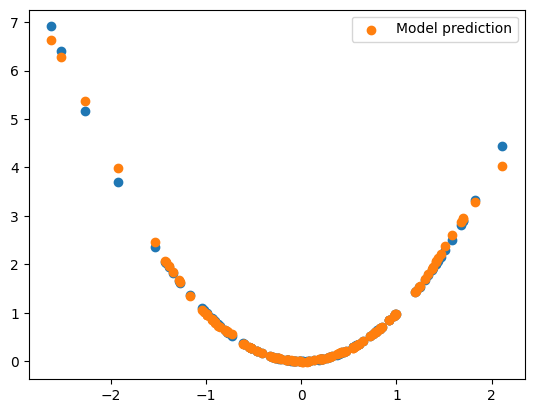

In [5]:
xs = np.random.normal(size=(128, 1))
ys = xs ** 2
num_epochs = 5000
for _ in range(num_epochs):
    params = update(params, xs, ys)

plt.scatter(xs, ys)
plt.scatter(xs, forward(params, xs), label='Model prediction')
plt.legend()